# Week 0 Report: Foundations of Quantitative Finance

**Focus:** Randomness, Volatility, and Stochastic Price Modeling


## Introduction

This report summarizes the concepts and practical exercises covered during Week 0 of the Quant program.
The primary objective of this week was to build intuition around randomness in financial markets,
analyze volatility using real market data, and simulate asset price movements using stochastic models.

Through data analysis and simulations, the exercises aim to develop a probabilistic mindset,
which is essential for understanding risk and asset pricing in quantitative finance.


## Day 2: Data Handling and Volatility Analysis


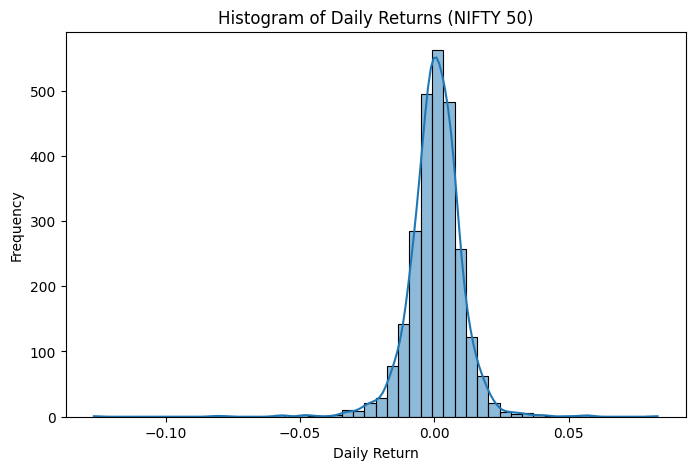

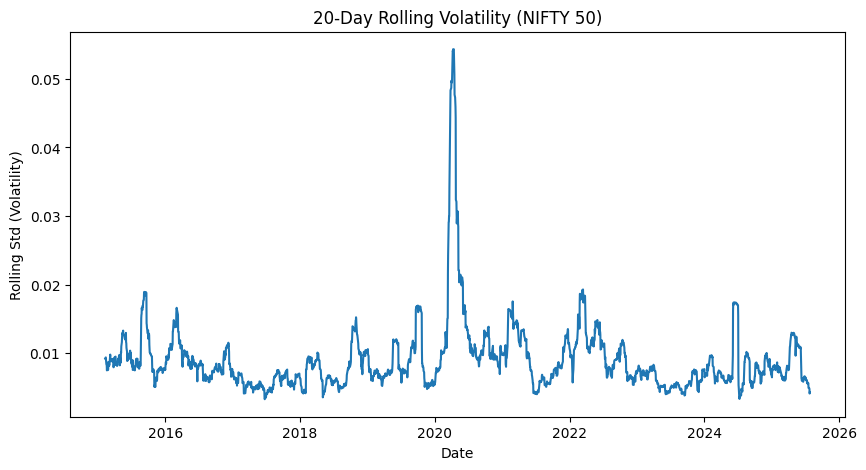

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("NIFTY 50_minute.csv")

# Datetime handling
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# Handle missing values
df = df.ffill()

# Resample to daily frequency
daily_close = df['close'].resample('D').last()
daily_close = daily_close.dropna()

# Compute daily returns
daily_returns = daily_close.pct_change().dropna()

# Plot histogram of returns
plt.figure(figsize=(8, 5))
sns.histplot(daily_returns, bins=50, kde=True)
plt.title("Histogram of Daily Returns (NIFTY 50)")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# Rolling volatility (20-day)
rolling_vol = daily_returns.rolling(window=20).std()

# Plot rolling volatility
plt.figure(figsize=(10, 5))
plt.plot(rolling_vol)
plt.title("20-Day Rolling Volatility (NIFTY 50)")
plt.xlabel("Date")
plt.ylabel("Rolling Std (Volatility)")
plt.show()

The histogram of daily returns shows that returns are centered around zero with fat tails,
a common feature of financial time series. The rolling standard deviation plot highlights
volatility clustering, where periods of high volatility tend to persist, followed by calmer periods.


## Day 3: Geometric Brownian Motion (GBM) Simulation


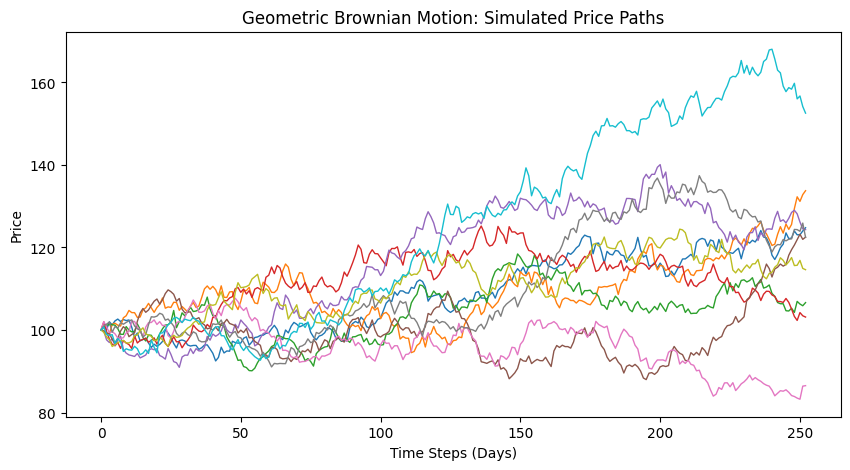

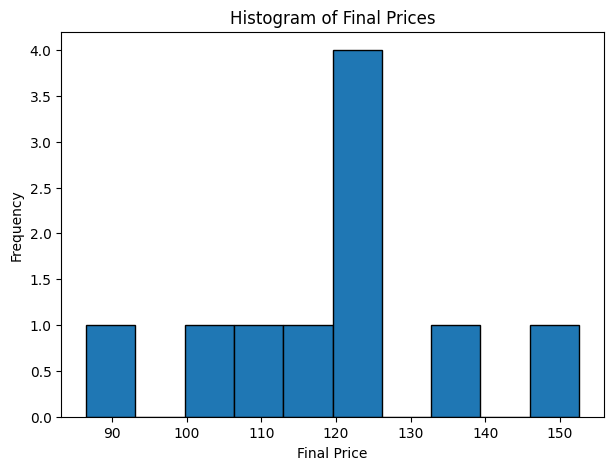

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# GBM parameters
S0 = 100        # initial price
mu = 0.08       # drift
sigma = 0.2     # volatility
T = 1.0         # time horizon (1 year)
N = 252         # trading days
dt = T / N
num_paths = 10

np.random.seed(42)

# Simulate GBM paths
paths = np.zeros((N + 1, num_paths))
paths[0] = S0

for t in range(1, N + 1):
    Z = np.random.normal(0, 1, num_paths)
    paths[t] = paths[t - 1] * np.exp(
        (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
    )

# Plot price paths
plt.figure(figsize=(10, 5))
for i in range(num_paths):
    plt.plot(paths[:, i], linewidth=1)

plt.title("Geometric Brownian Motion: Simulated Price Paths")
plt.xlabel("Time Steps (Days)")
plt.ylabel("Price")
plt.show()

# Histogram of final prices
final_prices = paths[-1]

plt.figure(figsize=(7, 5))
plt.hist(final_prices, bins=10, edgecolor='black')
plt.title("Histogram of Final Prices")
plt.xlabel("Final Price")
plt.ylabel("Frequency")
plt.show()

The simulated GBM paths demonstrate how asset prices can evolve very differently over time
despite identical initial conditions and parameters. The dispersion in final prices highlights
the role of randomness and volatility in determining financial risk.


## Quant Mindset Reflection: Randomness and Risk

Randomness is an inherent feature of financial markets rather than a flaw that can be removed.
Even when asset prices follow the same statistical model with fixed drift and volatility,
their future trajectories can differ significantly. This illustrates that risk is not about
predicting a single outcome, but about understanding the distribution of possible outcomes.

Monte Carlo simulations make this concept tangible by generating many plausible future price paths.
Each simulated path represents a potential market realization, and together they form a probability
distribution of outcomes. This distribution-based view is central to quantitative finance,
especially in asset pricing and risk management.

Volatility plays a crucial role in shaping this distribution. Higher volatility leads to greater
dispersion in final prices, increasing uncertainty and potential downside risk. As a result,
quantitative analysis focuses on probabilistic measures rather than point forecasts.

Overall, the quant mindset emphasizes modeling uncertainty, interpreting distributions,
and making informed decisions under uncertainty rather than attempting to eliminate randomness.
